In [21]:
from prody import *


In [22]:
from pylab import *

In [23]:
protein = parsePDB('1cv2')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 1cv2 downloaded (1cv2.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2750 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> Secondary structures were assigned to 182 residues.


In [24]:
selection = protein.select('name CA')

In [25]:
gnm = GNM('protein')

In [26]:
gnm.buildKirchhoff(selection)

@> Kirchhoff was built in 0.01s.


In [27]:
gnm.calcModes(n_modes='all')

@> 292 modes were calculated in 0.06s.


In [28]:
from prody import calcDynamicFlexibilityIndex

In [29]:
atoms = selection

In [30]:
select = 'protein'

In [31]:
dfi = calcDynamicFlexibilityIndex(gnm, atoms, select)

In [32]:
with open('dfi.npy', 'wb')as f:
    ...:     np.save(f, dfi)

In [33]:
print(dfi)

[ 3.83333333e+00  4.79487179e+00  2.30769231e+00  3.05128205e+00
  2.92307692e+00  3.12820513e+00  4.10256410e+00  2.46153846e+00
  2.76923077e+00  1.89743590e+00  1.23076923e+00  6.66666667e-01
  1.53846154e-01 -0.00000000e+00 -1.02564103e-01  6.15384615e-01
  1.17948718e+00  1.07692308e+00  1.79487179e+00  2.20512821e+00
  2.61538462e+00  2.51282051e+00  2.92307692e+00  2.66666667e+00
  2.87179487e+00  2.20512821e+00  1.53846154e+00  1.43589744e+00
  1.48717949e+00  1.28205128e+00  1.23076923e+00  8.46153846e-01
  1.02564103e+00  6.02564103e-01  3.71794872e-01  9.61538462e-01
  1.53846154e+00  1.79487179e+00  2.10256410e+00  2.56410256e+00
  2.28205128e+00  2.03846154e+00  2.69230769e+00  2.56410256e+00
  2.25641026e+00  2.33333333e+00  2.69230769e+00  2.35897436e+00
  2.38461538e+00  3.05128205e+00  3.07692308e+00  2.35897436e+00
  2.17948718e+00  2.20512821e+00  2.46153846e+00  1.79487179e+00
  2.10256410e+00  1.61538462e+00  1.56410256e+00  8.71794872e-01
  4.87179487e-01  3.07692

In [34]:

resnames_and_nums = list(zip(atoms.getResnames(), atoms.getResnums()))


dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]
dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]


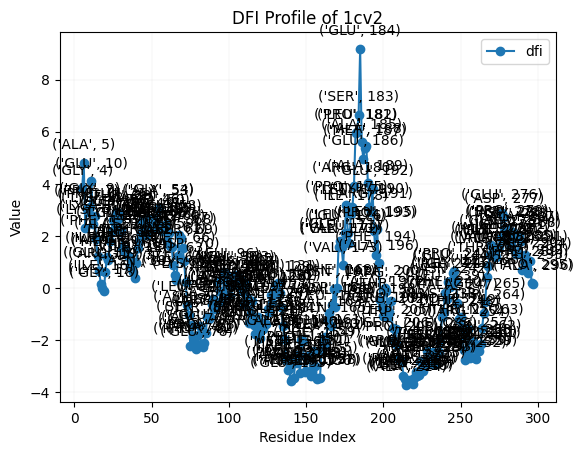

<Figure size 1000x600 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
    ...: import numpy as np
    ...: 
    ...: 
    ...: fig, ax = plt.subplots()
    ...: 
    ...: x_values = np.arange(5, 5 + len(dfi))
    ...: 
    ...:
    ...: ax.plot(x_values, dfi, label='dfi', marker='o')
    ...: 
    ...: 
    ...:
    ...: for i, value in enumerate(dfi_residues):
    ...:     ax.annotate(value, (i+5, dfi[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ...: 
    ...: grid(b=True, which='both', axis='both', linewidth=0.08)
    ...: x = np.linspace(0, 10, 20)
    ...: plt.xticks(np.arange(min(x), max(x)+300, 50))
    ...: 
    ...: 
    ...: y = np.linspace(0, 10, 100)
    ...: 
    ...: 
    ...: 
    ...:
    ...: ax.legend()
    ...: ax.set_xlabel('Residue Index')
    ...: ax.set_ylabel('Value')
    ...: ax.set_title('DFI Profile of 1cv2')
    ...: plt.figure(figsize=(10, 6))

    ...: 

    ...: plt.show()

In [36]:
writePDB('1cv2_DFI.pdb', selection, beta=dfi)

'1cv2_DFI.pdb'

In [37]:
for (resname, resnum), value in zip(resnames_and_nums, dfi):
    print(f"Residue {resnum} ({resname}): dfi = {value}")


Residue 4 (GLY): dfi = 3.8333333333333335
Residue 5 (ALA): dfi = 4.794871794871795
Residue 6 (LYS): dfi = 2.3076923076923075
Residue 7 (PRO): dfi = 3.051282051282051
Residue 8 (PHE): dfi = 2.923076923076923
Residue 9 (GLY): dfi = 3.128205128205128
Residue 10 (GLU): dfi = 4.102564102564102
Residue 11 (LYS): dfi = 2.4615384615384617
Residue 12 (LYS): dfi = 2.769230769230769
Residue 13 (PHE): dfi = 1.8974358974358974
Residue 14 (ILE): dfi = 1.2307692307692308
Residue 15 (GLU): dfi = 0.6666666666666666
Residue 16 (ILE): dfi = 0.15384615384615385
Residue 17 (LYS): dfi = -0.0
Residue 18 (GLY): dfi = -0.10256410256410256
Residue 19 (ARG): dfi = 0.6153846153846154
Residue 20 (ARG): dfi = 1.1794871794871795
Residue 21 (MET): dfi = 1.0769230769230769
Residue 22 (ALA): dfi = 1.794871794871795
Residue 23 (TYR): dfi = 2.2051282051282053
Residue 24 (ILE): dfi = 2.6153846153846154
Residue 25 (ASP): dfi = 2.5128205128205128
Residue 26 (GLU): dfi = 2.923076923076923
Residue 27 (GLY): dfi = 2.6666666666

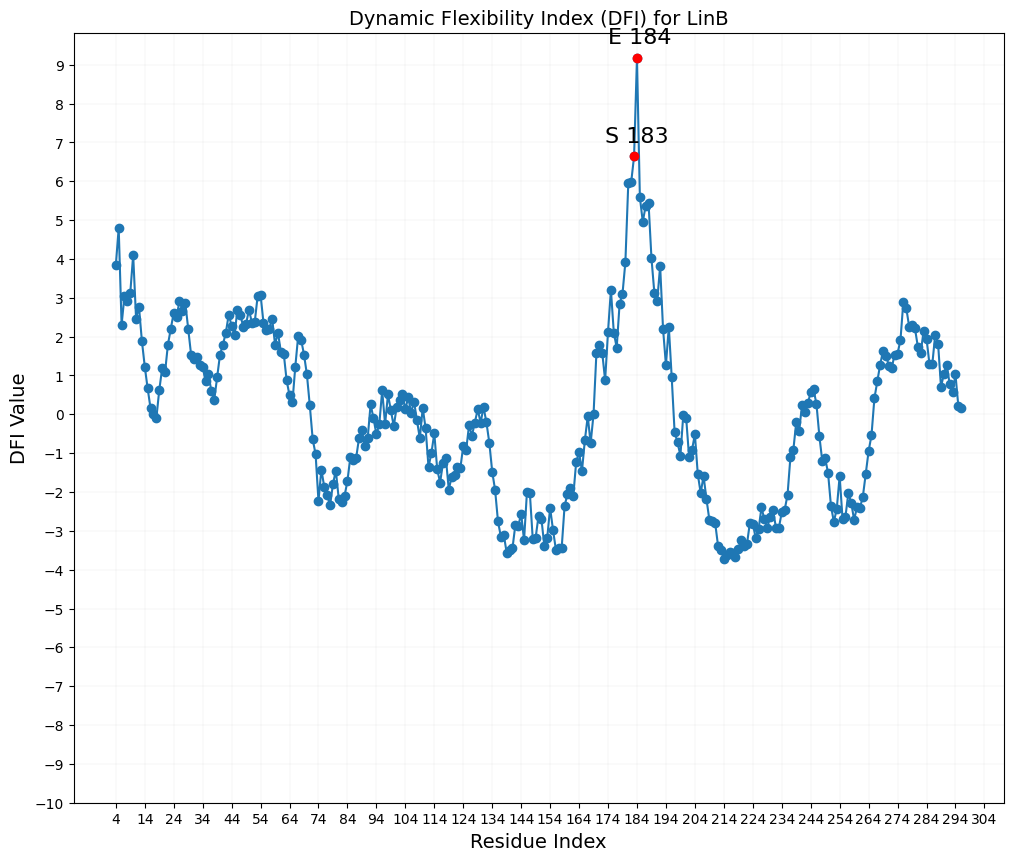

In [38]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}
    ...: 
    ...: dfi_values = np.load('dfi.npy')
    ...: fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

x_values = np.arange(4, 4 + len(dfi_values))

ax.plot(x_values, dfi_values, marker='o', linestyle='-')

subset_color = 'red'
for i, value_tuple in enumerate(dfi_residues):
    if  dfi_values[i] >= 6:
        
        value = value_tuple[0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
        
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, dfi_values[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, dfi_values[i], marker='o', linestyle='', color=subset_color)

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 10))

y = np.linspace(-10, 10, 100)
plt.yticks(np.arange(min(y), max(y), 1))

ax.set_xlabel('Residue Index', fontsize=14)
ax.set_ylabel('DFI Value', fontsize=14)
ax.set_title('Dynamic Flexibility Index (DFI) for LinB', fontsize=14)

plt.show()